Residency- 4 : Unsupervised Learning
Assignment : project 2

In [2]:
#Lets add libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#Lets import the data first
dfCars = pd.read_csv("vehicle-1.csv")

In [5]:
dfCars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

In [6]:
dfCars.shape

(846, 19)

In [7]:
dfCars.head(10)

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   
5          107          NaN                 106.0         172.0   
6           97         43.0                  73.0         173.0   
7           90         43.0                  66.0         157.0   
8           86         34.0                  62.0         140.0   
9           93         44.0                  98.0           NaN   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   
5                  50.0                        6          255.0   
6                  65.0                        6          153.0   
7                  65.0                        9          137.0   
8                  61.0                        7          122.0   
9                  62.0                       11          183.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   
5           26.0                    28.0                        169   
6           42.0                    19.0                        143   
7           48.0                    18.0                        146   
8           54.0                    17.0                        127   
9           36.0                    22.0                        146   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   
5            280.0              957.0                      264.0   
6            176.0              361.0                      172.0   
7            162.0              281.0                      164.0   
8            141.0              223.0                      112.0   
9            202.0              505.0                      152.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   
5                         85.0             5.0               9.0   
6                         66.0            13.0               1.0   
7                         67.0             3.0               3.0   
8                         64.0             2.0              14.0   
9                         64.0             4.0              14.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            1

# 1) Data pre-processing – Perform all the necessary preprocessing on the data ready to be fed to an Unsupervised algorithm

In [52]:
#Lets check if there are any duplicate records
duplicate = dfCars1.duplicated()
print(duplicate.sum())

0


In [10]:
dfCars.isna().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

The output shown above suggests that there are null values in multiple features.

In [22]:
dfCars1 = dfCars

# In order to impute missing/null values in above fatures,
- Lets first drop all rows from data set having missing/null values.
- Then using pairplot check the distribution of of each fature (which has null values) for each category (car, van and bus)
- If the distribution looks approximately normal then we can take mean of value of that category (car or bus or van) and impute into missing value for that row (if row is for car then mean value of car set, if row is for bus then mean value of bus and so on)
- This way we will be able to preserve nature of distribution

In [46]:
df = dfCars1.dropna()

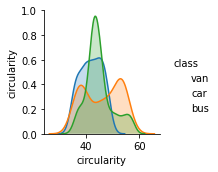

In [51]:
sns.pairplot(pd.DataFrame(df[['circularity','class']]), hue='class', diag_kind='kde')

In [79]:
df.skew()

compactness                    0.386048
circularity                    0.272723
distance_circularity           0.114244
radius_ratio                   0.396129
pr.axis_aspect_ratio           3.832899
max.length_aspect_ratio        6.698420
scatter_ratio                  0.596913
elongatedness                  0.053941
pr.axis_rectangularity         0.759483
max.length_rectangularity      0.271183
scaled_variance                0.629144
scaled_variance.1              0.822734
scaled_radius_of_gyration      0.266943
scaled_radius_of_gyration.1    2.156717
skewness_about                 0.782756
skewness_about.1               0.671462
skewness_about.2               0.255880
hollows_ratio                 -0.229941
dtype: float64

In [82]:
df.kurtosis()

compactness                    -0.511370
circularity                    -0.921232
distance_circularity           -0.967083
radius_ratio                    0.320925
pr.axis_aspect_ratio           29.574346
max.length_aspect_ratio        56.652717
scatter_ratio                  -0.633279
elongatedness                  -0.871370
pr.axis_rectangularity         -0.423033
max.length_rectangularity      -0.761519
scaled_variance                 0.086776
scaled_variance.1              -0.249523
scaled_radius_of_gyration      -0.532440
scaled_radius_of_gyration.1    12.030034
skewness_about                  0.126053
skewness_about.1               -0.173589
skewness_about.2               -0.577569
hollows_ratio                  -0.787775
dtype: float64

In [53]:
dfCars2 = dfCars           # let create copy of Original data set 

In [88]:
dfCars1['circularity'] = np.where(
                                    (dfCars1['circularity'].isnull()) 
                                    & 
                                    (dfCars1['class']=='car'), 
                                    df[df['class']=='car']['circularity'].mean(), # dataframe having no null values
                                    dfCars1['circularity']
                                )

In [89]:
dfCars1['circularity'] = np.where(
                                    (dfCars1['circularity'].isnull()) 
                                    & 
                                    (dfCars1['class']=='bus'), 
                                    df[df['class']=='bus']['circularity'].mean(),
                                    dfCars1['circularity']
                                )

In [90]:
dfCars1['circularity'] = np.where(
                                    (dfCars1['circularity'].isnull()) 
                                    & 
                                    (dfCars1['class']=='van'), 
                                    df[df['class']=='van']['circularity'].mean(),
                                    dfCars1['circularity']
                                )

In [74]:
df[df['class']=='van']['circularity'].mean()

42.00512820512821

In [91]:
pd.DataFrame(dfCars1['circularity']).head(6)

circularity
0    48.000000
1    41.000000
2    50.000000
3    41.000000
4    44.000000
5    44.892683

In [92]:
dfCars1[(dfCars1['circularity'].isnull())]

Empty DataFrame
Columns: [compactness, circularity, distance_circularity, radius_ratio, pr.axis_aspect_ratio, max.length_aspect_ratio, scatter_ratio, elongatedness, pr.axis_rectangularity, max.length_rectangularity, scaled_variance, scaled_variance.1, scaled_radius_of_gyration, scaled_radius_of_gyration.1, skewness_about, skewness_about.1, skewness_about.2, hollows_ratio, class]
Index: []

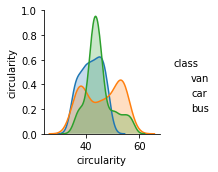

In [93]:
sns.pairplot(pd.DataFrame(dfCars1[['circularity','class']]), hue='class', diag_kind='kde')

In [94]:
dfCars1.skew()

compactness                    0.381271
circularity                    0.261701
distance_circularity           0.106585
radius_ratio                   0.394978
pr.axis_aspect_ratio           3.830362
max.length_aspect_ratio        6.778394
scatter_ratio                  0.607271
elongatedness                  0.047847
pr.axis_rectangularity         0.770889
max.length_rectangularity      0.256359
scaled_variance                0.651598
scaled_variance.1              0.842034
scaled_radius_of_gyration      0.279317
scaled_radius_of_gyration.1    2.083496
skewness_about                 0.776519
skewness_about.1               0.688017
skewness_about.2               0.249321
hollows_ratio                 -0.226341
dtype: float64

In [95]:
dfCars1.kurtosis()

compactness                    -0.535275
circularity                    -0.911035
distance_circularity           -0.977287
radius_ratio                    0.304921
pr.axis_aspect_ratio           29.889135
max.length_aspect_ratio        58.375455
scatter_ratio                  -0.616570
elongatedness                  -0.866601
pr.axis_rectangularity         -0.390508
max.length_rectangularity      -0.770098
scaled_variance                 0.120071
scaled_variance.1              -0.203819
scaled_radius_of_gyration      -0.496336
scaled_radius_of_gyration.1    11.455759
skewness_about                  0.094077
skewness_about.1               -0.144728
skewness_about.2               -0.588758
hollows_ratio                  -0.813435
dtype: float64

Above steps varifies that data ic correctly imputed as expected or as per step we expect

In [96]:
#Let do this for other feature

In [99]:
dfCars1['distance_circularity'] = np.where(
                                    (dfCars1['distance_circularity'].isnull()) 
                                    & 
                                    (dfCars1['class']=='car'), 
                                    df[df['class']=='car']['distance_circularity'].mean(), # dataframe having no null values
                                    dfCars1['distance_circularity']
                                )

dfCars1['distance_circularity'] = np.where(
                                    (dfCars1['distance_circularity'].isnull()) 
                                    & 
                                    (dfCars1['class']=='bus'), 
                                    df[df['class']=='bus']['distance_circularity'].mean(), # dataframe having no null values
                                    dfCars1['distance_circularity']
                                )

dfCars1['distance_circularity'] = np.where(
                                    (dfCars1['distance_circularity'].isnull()) 
                                    & 
                                    (dfCars1['class']=='van'), 
                                    df[df['class']=='van']['distance_circularity'].mean(), # dataframe having no null values
                                    dfCars1['distance_circularity']
                                )

In [100]:
dfCars1[(dfCars1['distance_circularity'].isnull())]

Empty DataFrame
Columns: [compactness, circularity, distance_circularity, radius_ratio, pr.axis_aspect_ratio, max.length_aspect_ratio, scatter_ratio, elongatedness, pr.axis_rectangularity, max.length_rectangularity, scaled_variance, scaled_variance.1, scaled_radius_of_gyration, scaled_radius_of_gyration.1, skewness_about, skewness_about.1, skewness_about.2, hollows_ratio, class]
Index: []

In [101]:
dfCars1['radius_ratio'] = np.where(
                                    (dfCars1['radius_ratio'].isnull()) 
                                    & 
                                    (dfCars1['class']=='car'), 
                                    df[df['class']=='car']['radius_ratio'].mean(), # dataframe having no null values
                                    dfCars1['radius_ratio']
                                )

dfCars1['radius_ratio'] = np.where(
                                    (dfCars1['radius_ratio'].isnull()) 
                                    & 
                                    (dfCars1['class']=='bus'), 
                                    df[df['class']=='bus']['radius_ratio'].mean(), # dataframe having no null values
                                    dfCars1['radius_ratio']
                                )

dfCars1['radius_ratio'] = np.where(
                                    (dfCars1['radius_ratio'].isnull()) 
                                    & 
                                    (dfCars1['class']=='van'), 
                                    df[df['class']=='van']['radius_ratio'].mean(), # dataframe having no null values
                                    dfCars1['radius_ratio']
                                )

In [102]:
dfCars1[(dfCars1['radius_ratio'].isnull())]

Empty DataFrame
Columns: [compactness, circularity, distance_circularity, radius_ratio, pr.axis_aspect_ratio, max.length_aspect_ratio, scatter_ratio, elongatedness, pr.axis_rectangularity, max.length_rectangularity, scaled_variance, scaled_variance.1, scaled_radius_of_gyration, scaled_radius_of_gyration.1, skewness_about, skewness_about.1, skewness_about.2, hollows_ratio, class]
Index: []

In [103]:
dfCars1['pr.axis_aspect_ratio'] = np.where(
                                    (dfCars1['pr.axis_aspect_ratio'].isnull()) 
                                    & 
                                    (dfCars1['class']=='car'), 
                                    df[df['class']=='car']['pr.axis_aspect_ratio'].mean(), # dataframe having no null values
                                    dfCars1['pr.axis_aspect_ratio']
                                )

dfCars1['pr.axis_aspect_ratio'] = np.where(
                                    (dfCars1['pr.axis_aspect_ratio'].isnull()) 
                                    & 
                                    (dfCars1['class']=='bus'), 
                                    df[df['class']=='bus']['pr.axis_aspect_ratio'].mean(), # dataframe having no null values
                                    dfCars1['pr.axis_aspect_ratio']
                                )

dfCars1['pr.axis_aspect_ratio'] = np.where(
                                    (dfCars1['pr.axis_aspect_ratio'].isnull()) 
                                    & 
                                    (dfCars1['class']=='van'), 
                                    df[df['class']=='van']['pr.axis_aspect_ratio'].mean(), # dataframe having no null values
                                    dfCars1['pr.axis_aspect_ratio']
                                )

In [104]:
dfCars1['scatter_ratio'] = np.where(
                                    (dfCars1['scatter_ratio'].isnull()) 
                                    & 
                                    (dfCars1['class']=='car'), 
                                    df[df['class']=='car']['scatter_ratio'].mean(), # dataframe having no null values
                                    dfCars1['scatter_ratio']
                                )

dfCars1['scatter_ratio'] = np.where(
                                    (dfCars1['scatter_ratio'].isnull()) 
                                    & 
                                    (dfCars1['class']=='bus'), 
                                    df[df['class']=='bus']['scatter_ratio'].mean(), # dataframe having no null values
                                    dfCars1['scatter_ratio']
                                )

dfCars1['scatter_ratio'] = np.where(
                                    (dfCars1['scatter_ratio'].isnull()) 
                                    & 
                                    (dfCars1['class']=='van'), 
                                    df[df['class']=='van']['scatter_ratio'].mean(), # dataframe having no null values
                                    dfCars1['scatter_ratio']
                                )

In [105]:
dfCars1['elongatedness'] = np.where(
                                    (dfCars1['elongatedness'].isnull()) 
                                    & 
                                    (dfCars1['class']=='car'), 
                                    df[df['class']=='car']['elongatedness'].mean(), # dataframe having no null values
                                    dfCars1['elongatedness']
                                )

dfCars1['elongatedness'] = np.where(
                                    (dfCars1['elongatedness'].isnull()) 
                                    & 
                                    (dfCars1['class']=='bus'), 
                                    df[df['class']=='bus']['elongatedness'].mean(), # dataframe having no null values
                                    dfCars1['elongatedness']
                                )

dfCars1['elongatedness'] = np.where(
                                    (dfCars1['elongatedness'].isnull()) 
                                    & 
                                    (dfCars1['class']=='van'), 
                                    df[df['class']=='van']['elongatedness'].mean(), # dataframe having no null values
                                    dfCars1['elongatedness']
                                )

In [107]:
dfCars1['pr.axis_rectangularity'] = np.where(
                                    (dfCars1['pr.axis_rectangularity'].isnull()) 
                                    & 
                                    (dfCars1['class']=='car'), 
                                    df[df['class']=='car']['pr.axis_rectangularity'].mean(), # dataframe having no null values
                                    dfCars1['pr.axis_rectangularity']
                                )

dfCars1['pr.axis_rectangularity'] = np.where(
                                    (dfCars1['pr.axis_rectangularity'].isnull()) 
                                    & 
                                    (dfCars1['class']=='bus'), 
                                    df[df['class']=='bus']['pr.axis_rectangularity'].mean(), # dataframe having no null values
                                    dfCars1['pr.axis_rectangularity']
                                )

dfCars1['pr.axis_rectangularity'] = np.where(
                                    (dfCars1['pr.axis_rectangularity'].isnull()) 
                                    & 
                                    (dfCars1['class']=='van'), 
                                    df[df['class']=='van']['pr.axis_rectangularity'].mean(), # dataframe having no null values
                                    dfCars1['pr.axis_rectangularity']
                                )

In [108]:
dfCars1['scaled_variance'] = np.where(
                                    (dfCars1['scaled_variance'].isnull()) 
                                    & 
                                    (dfCars1['class']=='car'), 
                                    df[df['class']=='car']['scaled_variance'].mean(), # dataframe having no null values
                                    dfCars1['scaled_variance']
                                )

dfCars1['scaled_variance'] = np.where(
                                    (dfCars1['scaled_variance'].isnull()) 
                                    & 
                                    (dfCars1['class']=='bus'), 
                                    df[df['class']=='bus']['scaled_variance'].mean(), # dataframe having no null values
                                    dfCars1['scaled_variance']
                                )

dfCars1['scaled_variance'] = np.where(
                                    (dfCars1['scaled_variance'].isnull()) 
                                    & 
                                    (dfCars1['class']=='van'), 
                                    df[df['class']=='van']['scaled_variance'].mean(), # dataframe having no null values
                                    dfCars1['scaled_variance']
                                )

In [109]:
dfCars1['scaled_variance.1'] = np.where(
                                    (dfCars1['scaled_variance.1'].isnull()) 
                                    & 
                                    (dfCars1['class']=='car'), 
                                    df[df['class']=='car']['scaled_variance.1'].mean(), # dataframe having no null values
                                    dfCars1['scaled_variance.1']
                                )

dfCars1['scaled_variance.1'] = np.where(
                                    (dfCars1['scaled_variance.1'].isnull()) 
                                    & 
                                    (dfCars1['class']=='bus'), 
                                    df[df['class']=='bus']['scaled_variance.1'].mean(), # dataframe having no null values
                                    dfCars1['scaled_variance.1']
                                )

dfCars1['scaled_variance.1'] = np.where(
                                    (dfCars1['scaled_variance.1'].isnull()) 
                                    & 
                                    (dfCars1['class']=='van'), 
                                    df[df['class']=='van']['scaled_variance.1'].mean(), # dataframe having no null values
                                    dfCars1['scaled_variance.1']
                                )

In [110]:
dfCars1['scaled_radius_of_gyration'] = np.where(
                                    (dfCars1['scaled_radius_of_gyration'].isnull()) 
                                    & 
                                    (dfCars1['class']=='car'), 
                                    df[df['class']=='car']['scaled_radius_of_gyration'].mean(), # dataframe having no null values
                                    dfCars1['scaled_radius_of_gyration']
                                )

dfCars1['scaled_radius_of_gyration'] = np.where(
                                    (dfCars1['scaled_radius_of_gyration'].isnull()) 
                                    & 
                                    (dfCars1['class']=='bus'), 
                                    df[df['class']=='bus']['scaled_radius_of_gyration'].mean(), # dataframe having no null values
                                    dfCars1['scaled_radius_of_gyration']
                                )

dfCars1['scaled_radius_of_gyration'] = np.where(
                                    (dfCars1['scaled_radius_of_gyration'].isnull()) 
                                    & 
                                    (dfCars1['class']=='van'), 
                                    df[df['class']=='van']['scaled_radius_of_gyration'].mean(), # dataframe having no null values
                                    dfCars1['scaled_radius_of_gyration']
                                )

In [111]:
dfCars1['scaled_radius_of_gyration.1'] = np.where(
                                    (dfCars1['scaled_radius_of_gyration.1'].isnull()) 
                                    & 
                                    (dfCars1['class']=='car'), 
                                    df[df['class']=='car']['scaled_radius_of_gyration.1'].mean(), # dataframe having no null values
                                    dfCars1['scaled_radius_of_gyration.1']
                                )

dfCars1['scaled_radius_of_gyration.1'] = np.where(
                                    (dfCars1['scaled_radius_of_gyration.1'].isnull()) 
                                    & 
                                    (dfCars1['class']=='bus'), 
                                    df[df['class']=='bus']['scaled_radius_of_gyration.1'].mean(), # dataframe having no null values
                                    dfCars1['scaled_radius_of_gyration.1']
                                )

dfCars1['scaled_radius_of_gyration.1'] = np.where(
                                    (dfCars1['scaled_radius_of_gyration.1'].isnull()) 
                                    & 
                                    (dfCars1['class']=='van'), 
                                    df[df['class']=='van']['scaled_radius_of_gyration.1'].mean(), # dataframe having no null values
                                    dfCars1['scaled_radius_of_gyration.1']
                                )

In [112]:
dfCars1['skewness_about'] = np.where(
                                    (dfCars1['skewness_about'].isnull()) 
                                    & 
                                    (dfCars1['class']=='car'), 
                                    df[df['class']=='car']['skewness_about'].mean(), # dataframe having no null values
                                    dfCars1['skewness_about']
                                )

dfCars1['skewness_about'] = np.where(
                                    (dfCars1['skewness_about'].isnull()) 
                                    & 
                                    (dfCars1['class']=='bus'), 
                                    df[df['class']=='bus']['skewness_about'].mean(), # dataframe having no null values
                                    dfCars1['skewness_about']
                                )

dfCars1['skewness_about'] = np.where(
                                    (dfCars1['skewness_about'].isnull()) 
                                    & 
                                    (dfCars1['class']=='van'), 
                                    df[df['class']=='van']['skewness_about'].mean(), # dataframe having no null values
                                    dfCars1['skewness_about']
                                )

In [113]:
dfCars1['skewness_about.1'] = np.where(
                                    (dfCars1['skewness_about.1'].isnull()) 
                                    & 
                                    (dfCars1['class']=='car'), 
                                    df[df['class']=='car']['skewness_about.1'].mean(), # dataframe having no null values
                                    dfCars1['skewness_about.1']
                                )

dfCars1['skewness_about.1'] = np.where(
                                    (dfCars1['skewness_about.1'].isnull()) 
                                    & 
                                    (dfCars1['class']=='bus'), 
                                    df[df['class']=='bus']['skewness_about.1'].mean(), # dataframe having no null values
                                    dfCars1['skewness_about.1']
                                )

dfCars1['skewness_about.1'] = np.where(
                                    (dfCars1['skewness_about.1'].isnull()) 
                                    & 
                                    (dfCars1['class']=='van'), 
                                    df[df['class']=='van']['skewness_about.1'].mean(), # dataframe having no null values
                                    dfCars1['skewness_about.1']
                                )

In [114]:
dfCars1['skewness_about.2'] = np.where(
                                    (dfCars1['skewness_about.2'].isnull()) 
                                    & 
                                    (dfCars1['class']=='car'), 
                                    df[df['class']=='car']['skewness_about.2'].mean(), # dataframe having no null values
                                    dfCars1['skewness_about.2']
                                )

dfCars1['skewness_about.2'] = np.where(
                                    (dfCars1['skewness_about.2'].isnull()) 
                                    & 
                                    (dfCars1['class']=='bus'), 
                                    df[df['class']=='bus']['skewness_about.2'].mean(), # dataframe having no null values
                                    dfCars1['skewness_about.2']
                                )

dfCars1['skewness_about.2'] = np.where(
                                    (dfCars1['skewness_about.2'].isnull()) 
                                    & 
                                    (dfCars1['class']=='van'), 
                                    df[df['class']=='van']['skewness_about.2'].mean(), # dataframe having no null values
                                    dfCars1['skewness_about.2']
                                )

In [116]:
dfCars1.isna().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

# Imputation is complete

# 2) Understanding the attributes - Find relationship between different attributes (Independent variables) and choose carefully which all attributes have to be a part of the analysis and why

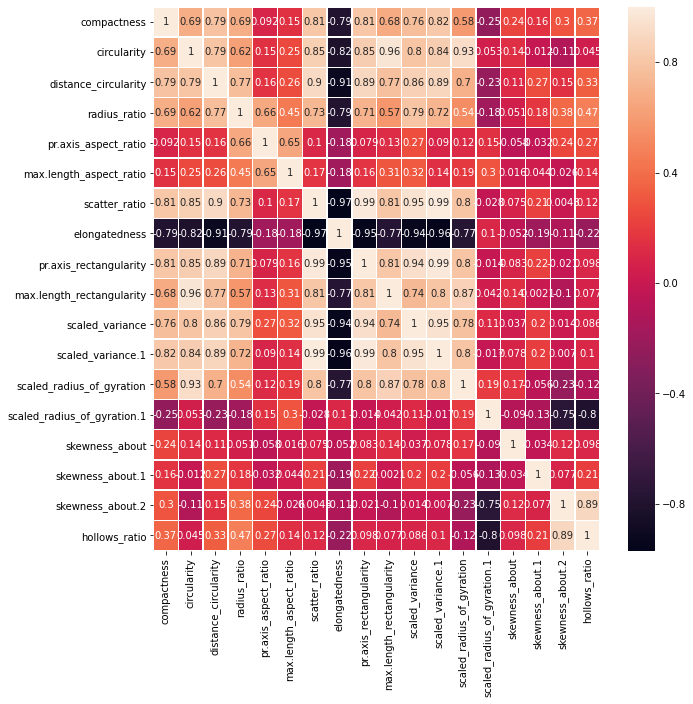

In [124]:
fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches
sns.heatmap(dfCars1.corr(), annot=True, linewidths=.5, ax=ax)

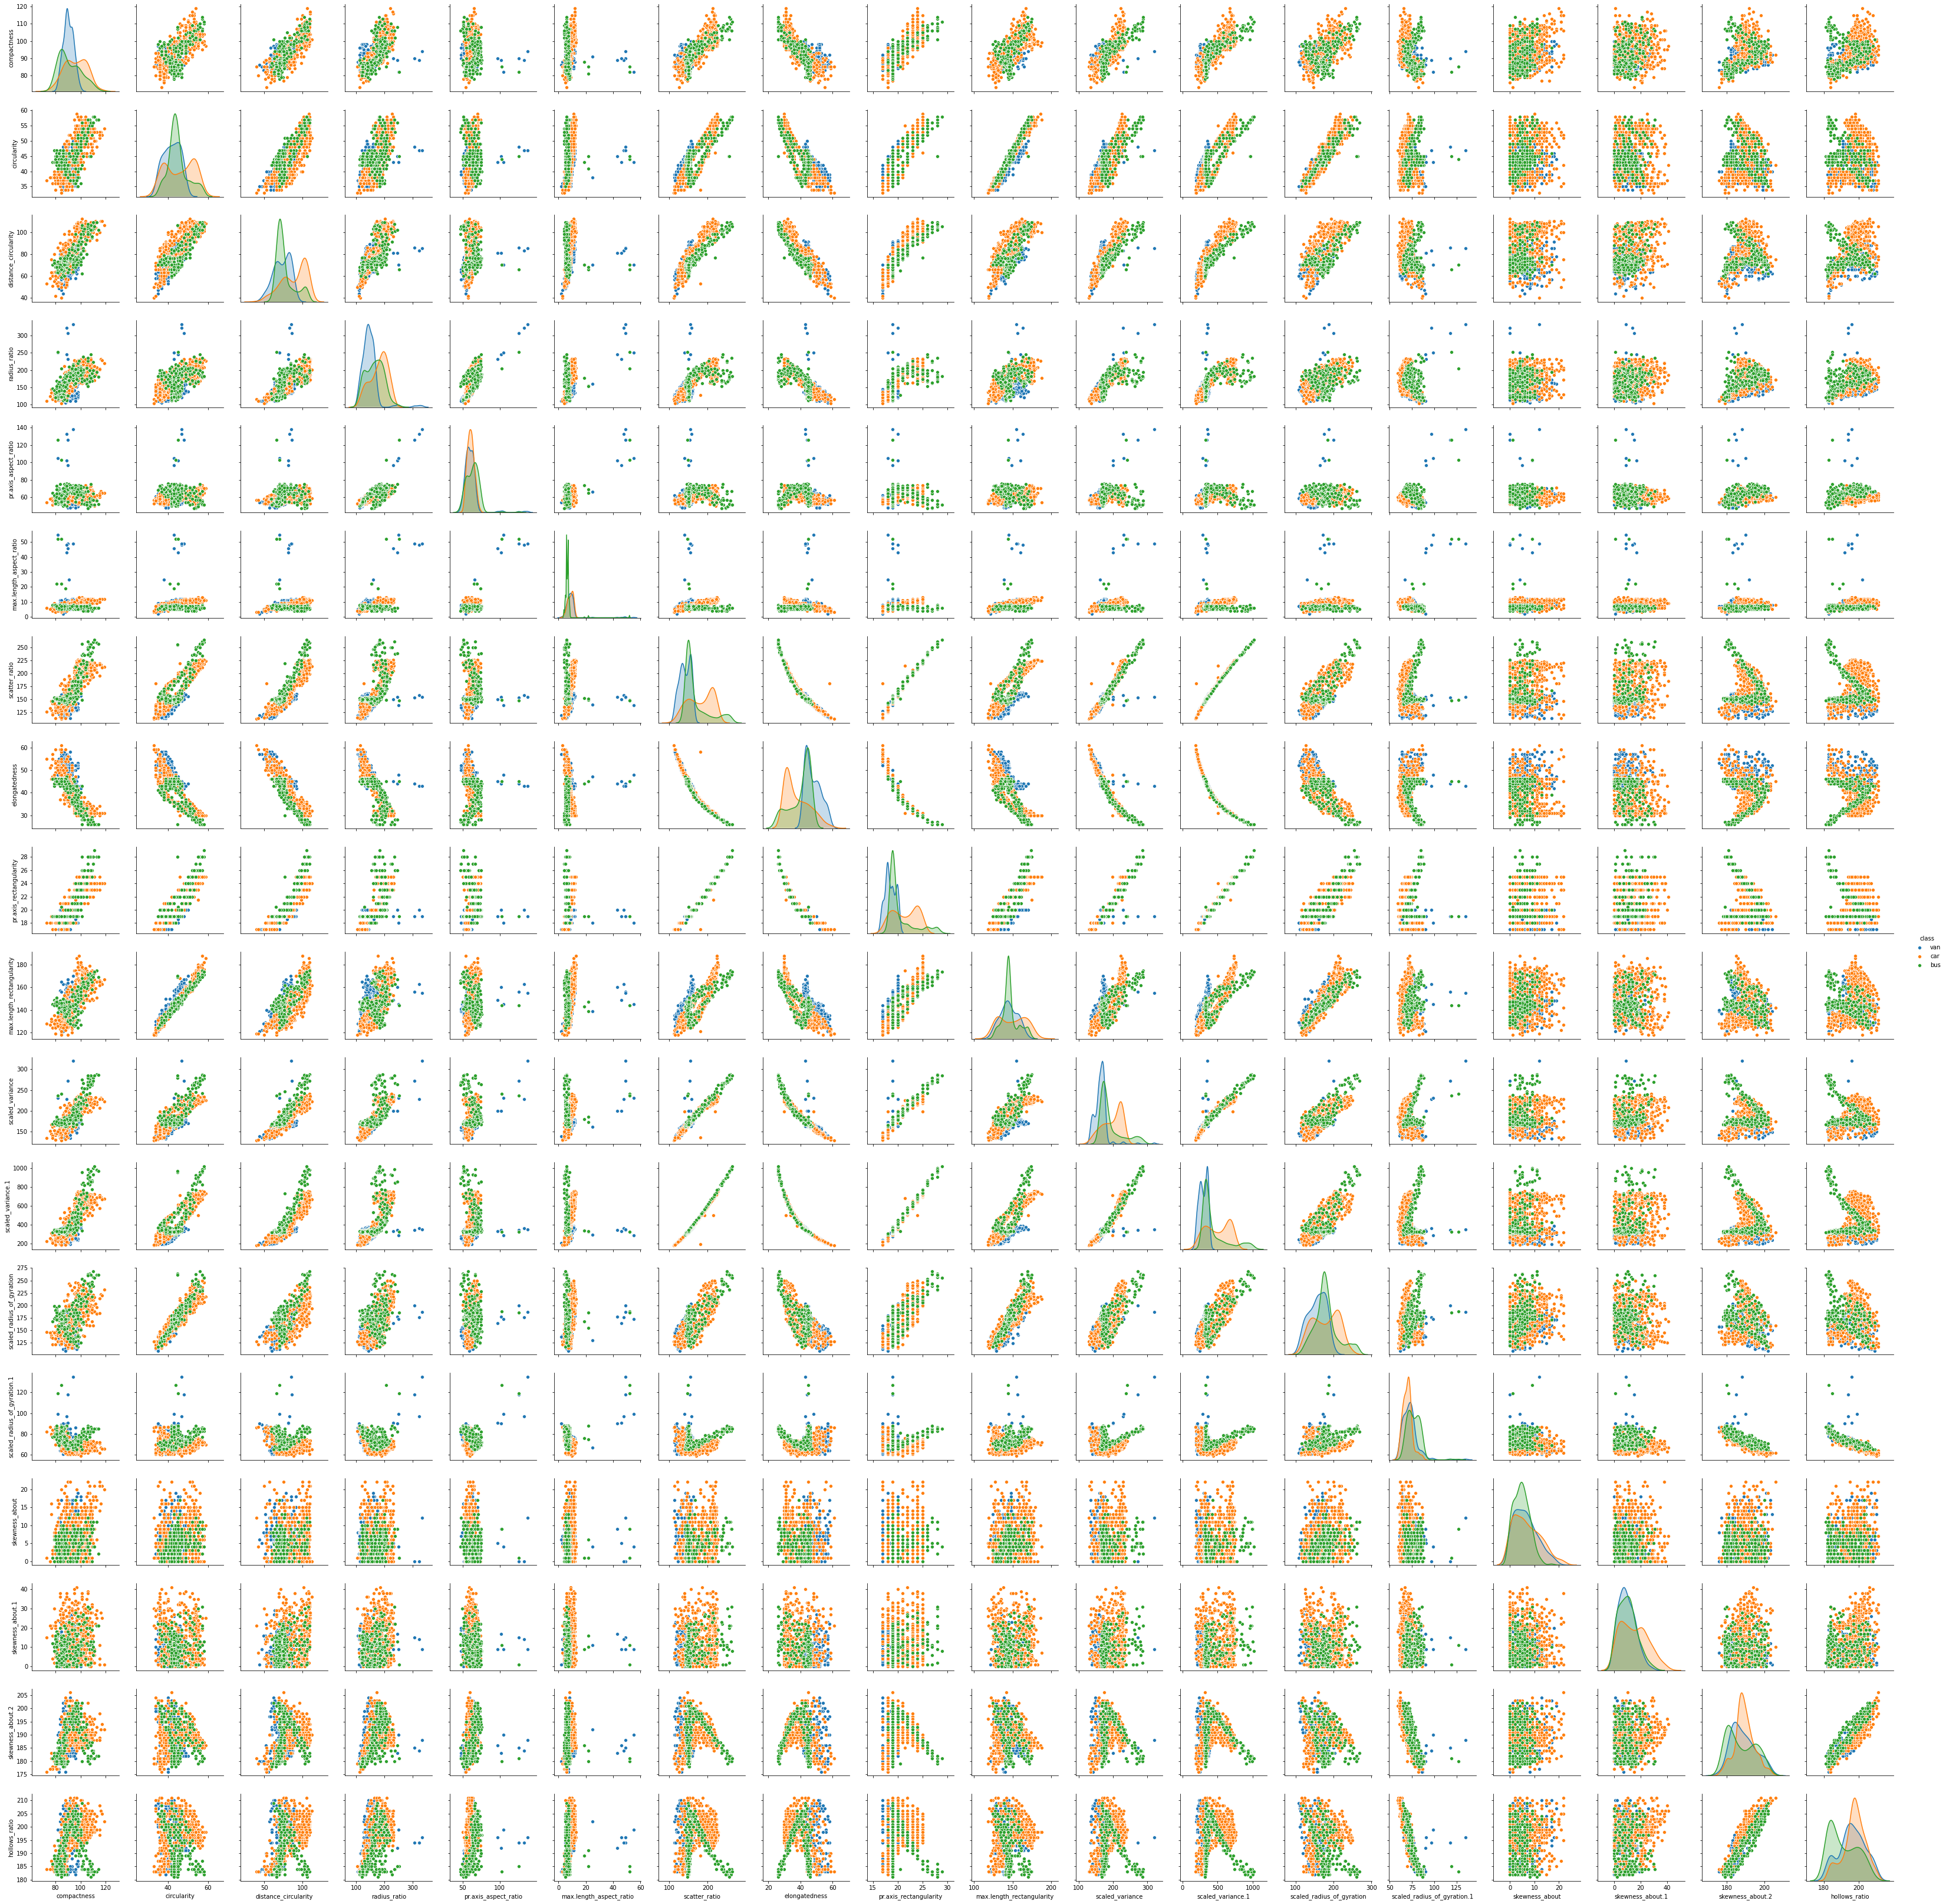

In [125]:
sns.pairplot(dfCars1, hue='class', diag_kind='kde')

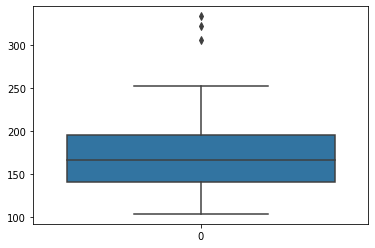

In [131]:
#dfCars1['radius_ratio'].boxplot(figsize=(20,3))
sns.boxplot(data=dfCars1['radius_ratio'])